# A quick demo of dabl on some toy datasets and slightly more interesting datasets

# Scikit-learn build-in datasets:

## Boston housing regressionmm

In [1]:
import dabl
from sklearn.datasets import load_boston
boston = load_boston()
# create a dataframe from an sklearn dataset bunch
boston_df = dabl.utils.data_df_from_bunch(boston)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Target looks like regression


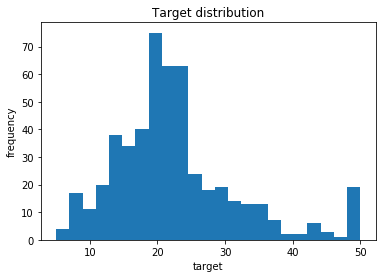

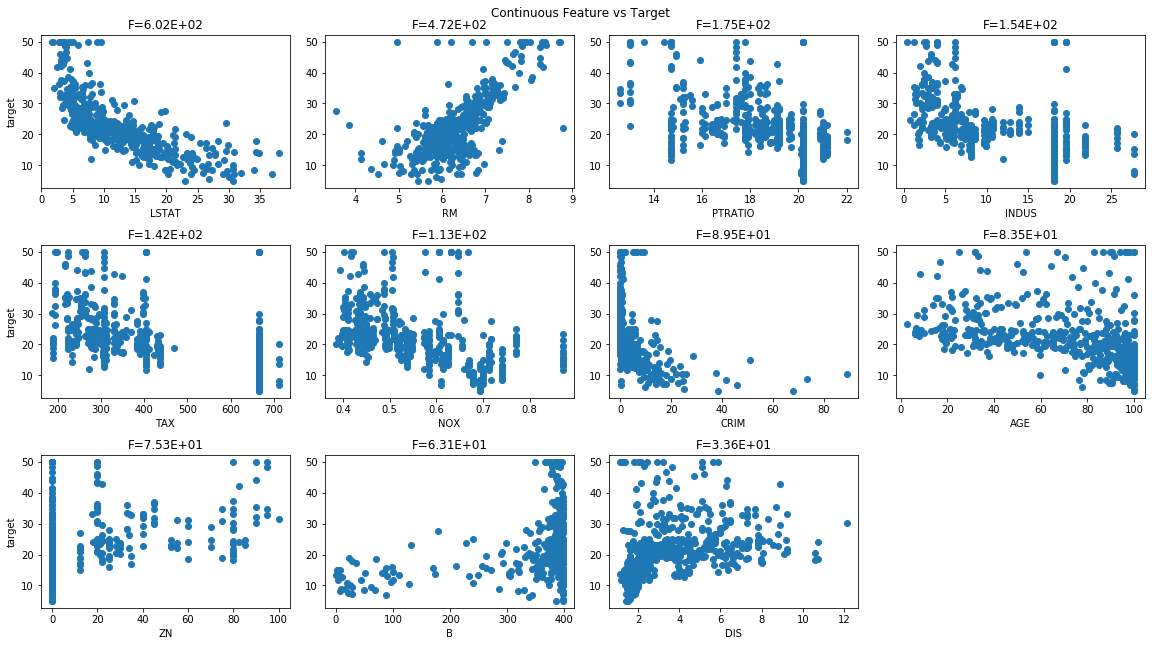

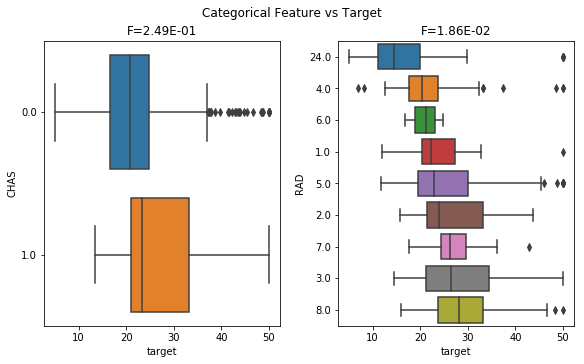

In [2]:
dabl.plot_supervised(boston_df, 'target')

Rad is detected as categorical, which might make sense. If you disagree, you can specify it to be continuous:

Target looks like regression


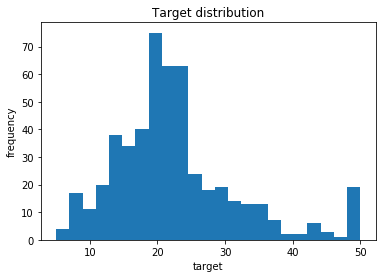

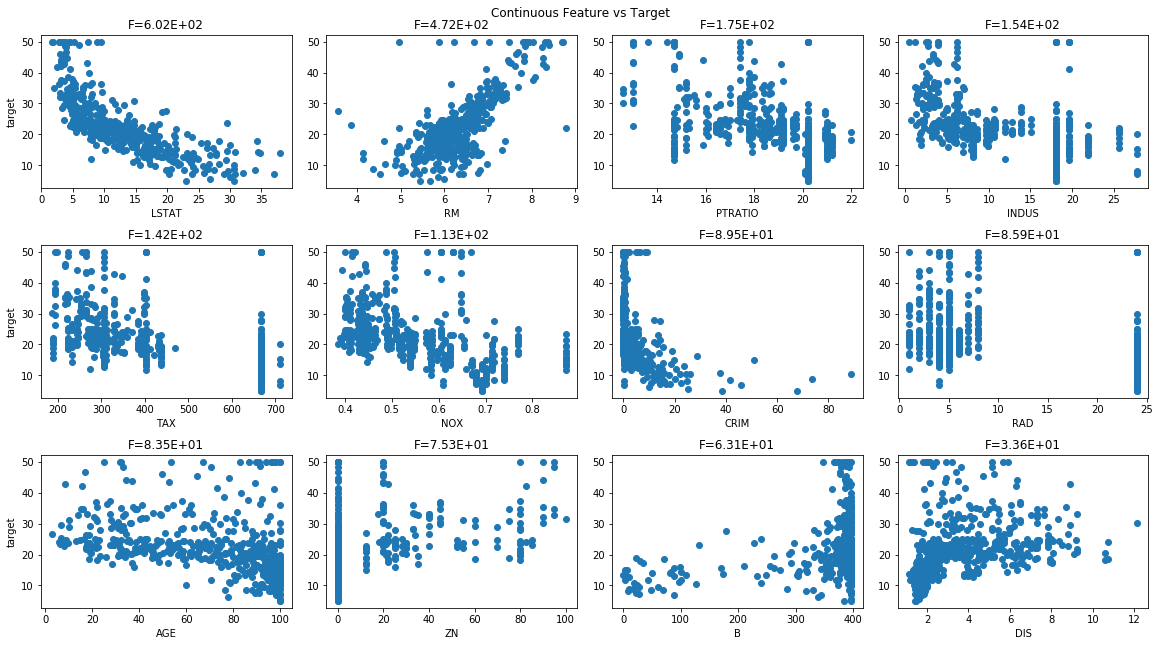

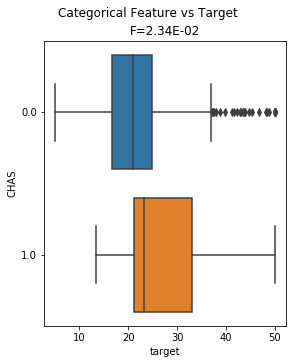

In [3]:
dabl.plot_supervised(boston_df, 'target', type_hints={'RAD': 'continuous'})

In [4]:
sr = dabl.SimpleRegressor()
sr.fit(boston_df, target_col='target')

DummyRegressor()
neg_mean_squared_error: -96.0328    r2: -0.7210    
new best (using r2):
neg_mean_squared_error   -96.032782
r2                        -0.720956
Name: DummyRegressor(), dtype: float64
DecisionTreeRegressor(max_depth=1)
neg_mean_squared_error: -68.0500    r2: -0.3341    
new best (using r2):
neg_mean_squared_error   -68.050011
r2                        -0.334064
Name: DecisionTreeRegressor(max_depth=1), dtype: float64
DecisionTreeRegressor(max_depth=5)
neg_mean_squared_error: -39.3669    r2: 0.1777    
new best (using r2):
neg_mean_squared_error   -39.366864
r2                         0.177728
Name: DecisionTreeRegressor(max_depth=5), dtype: float64
Ridge(alpha=10)
neg_mean_squared_error: -33.7493    r2: 0.4593    
new best (using r2):
neg_mean_squared_error   -33.749323
r2                         0.459303
Name: Ridge(alpha=10), dtype: float64
Lasso(alpha=10)
neg_mean_squared_error: -96.0328    r2: -0.7210    
Best model:
Ridge(alpha=10)
Best Scores:
neg_mean_squared_er

SimpleRegressor(random_state=None, refit=True, verbose=1)

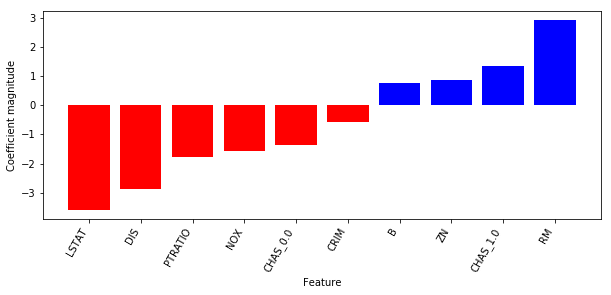

In [5]:
# highly regularized ridge won. r^2 of .5 is not great but also not terrible.
# the fast regression models are not really thought-through yet.
# still we can look at coefficients.
dabl.explain(sr)

In [6]:
# The top features shown in the plot (using f test) also have the largest (absolute) coefficient values, lstat and RM.
# only the top 10 coefficients are shown right now. Clearly we could do better by adding non-linear transformations to the data from the plots above.
# future work!

## Wine classification

In [7]:
from sklearn.datasets import load_wine
wine_df = dabl.utils.data_df_from_bunch(load_wine())
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


Target looks like classification
baseline score: 0.333
baseline score: 0.333
baseline score: 0.333


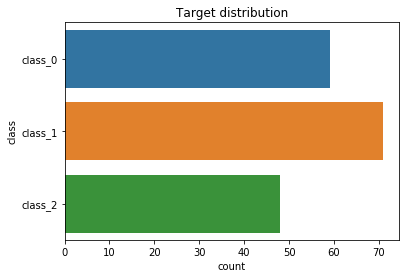

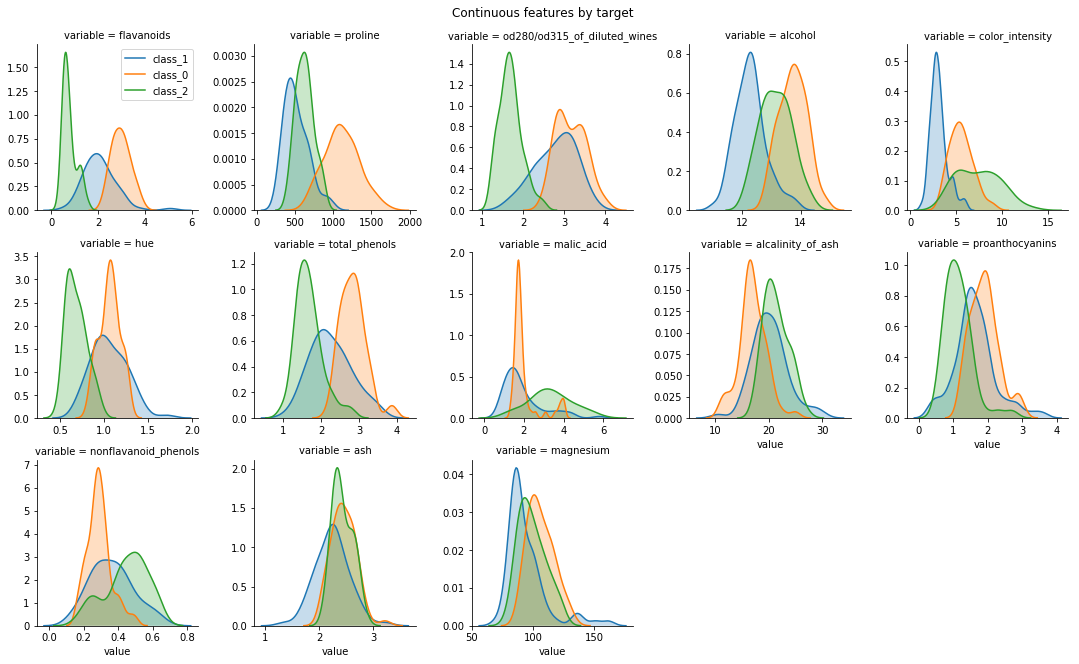

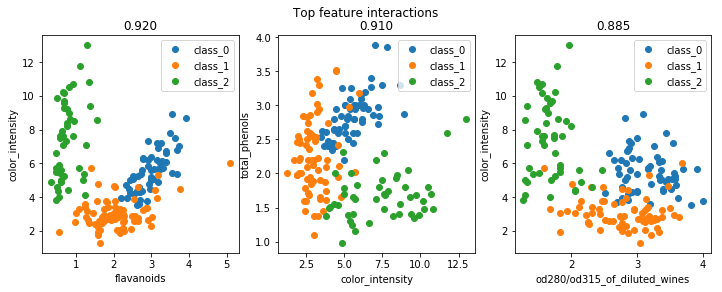

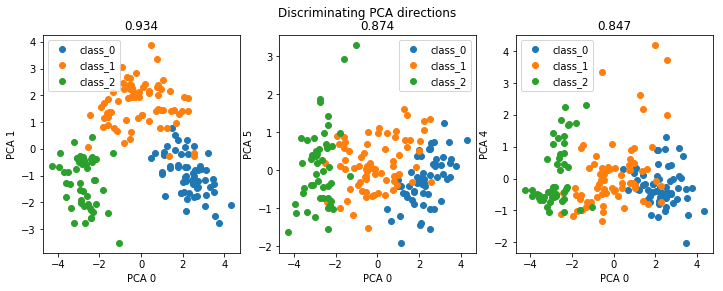

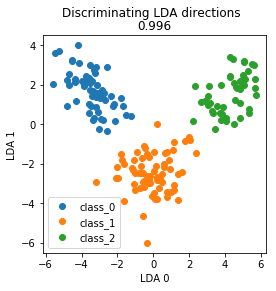

In [8]:
dabl.plot_supervised(wine_df, 'target')

In [9]:
# obviously LDA solved the problem as we can see in the last plot. I might just want to use LDA or another linear model.
# Or we see what the SimpleClassifier does:
sc = dabl.SimpleClassifier()
sc.fit(wine_df, target_col='target')

DummyClassifier(strategy='prior')
accuracy: 0.3990    precision_macro: 0.1330    recall_macro: 0.3333    
new best (using recall_macro):
accuracy           0.398990
precision_macro    0.132997
recall_macro       0.333333
Name: DummyClassifier(strategy='prior'), dtype: float64
GaussianNB()
accuracy: 0.9558    precision_macro: 0.9605    recall_macro: 0.9608    
new best (using recall_macro):
accuracy           0.955839
precision_macro    0.960527
recall_macro       0.960794
Name: GaussianNB(), dtype: float64
MultinomialNB()
accuracy: 0.9339    precision_macro: 0.9475    recall_macro: 0.9363    
DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.5337    precision_macro: 0.4190    recall_macro: 0.5922    
DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.8831    precision_macro: 0.8980    recall_macro: 0.8922    
DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.8723    precision_macro: 0.8882    recall_macr

SimpleClassifier(random_state=None, refit=True, verbose=1)

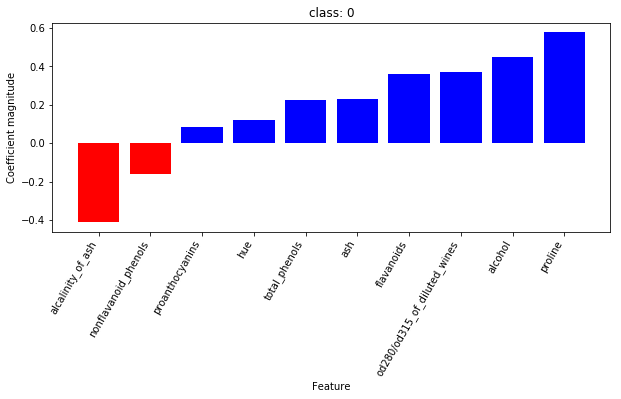

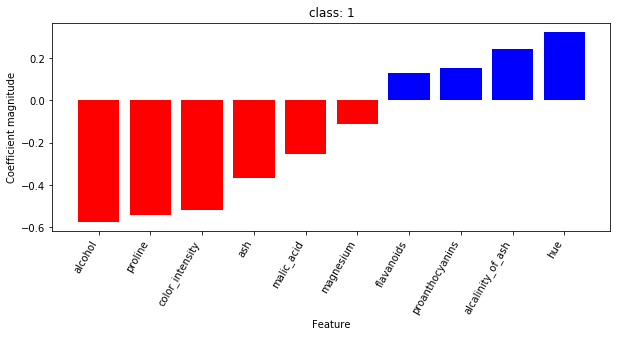

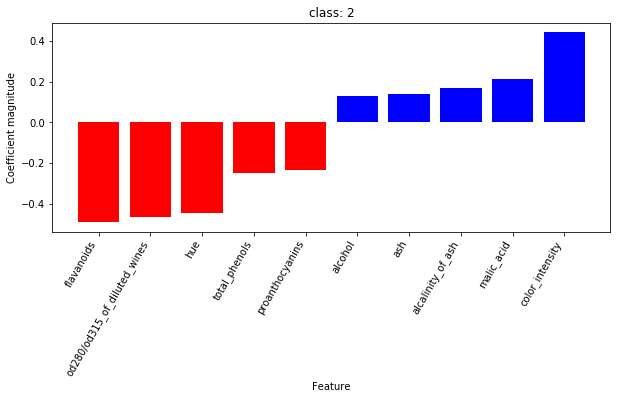

In [10]:
# logistic regression has slightly higher accuracy and macro-average recall (which is the main metric we use)
# than linear discriminant analysis. Not really a shocker.
dabl.explain(sc)

Interestingly the large coefficients don't really correspond to what's shown in the univariate or pairplots. Possibly because the data is very correlated? Who knows!
I assume we could create a simpler model with less features from the plots above. Maybe lasso next time?

## Ames housing dataset

In [11]:
ames_df = dabl.datasets.load_ames()
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


/home/andy/checkout/dabl/dabl/preprocessing.py:237: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


Target looks like regression
Showing only top 10 of 22 continuous features
Showing only top 10 of 46 categorical features


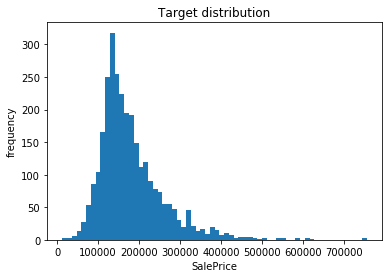

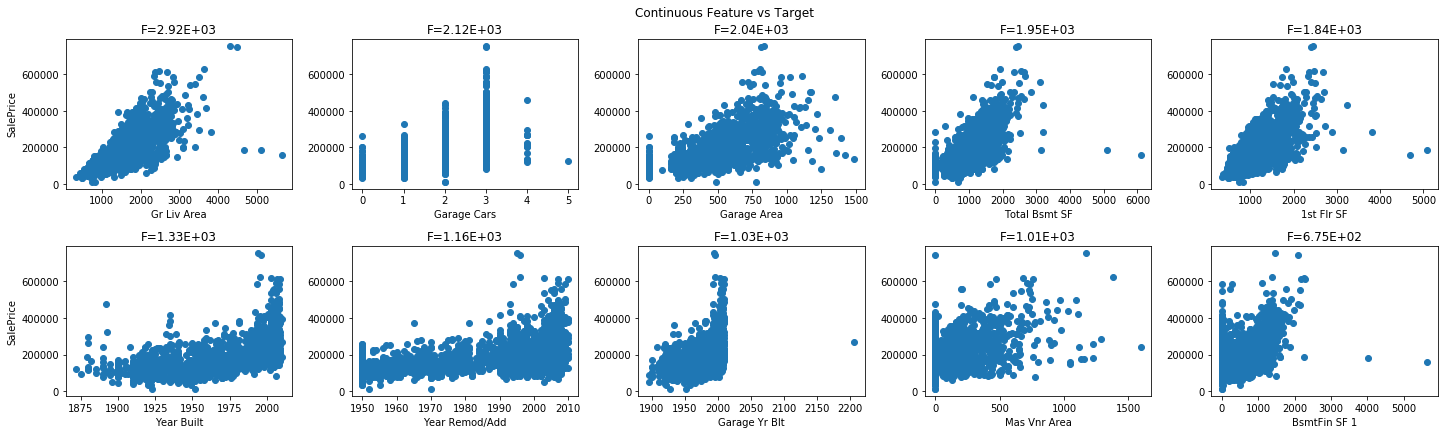

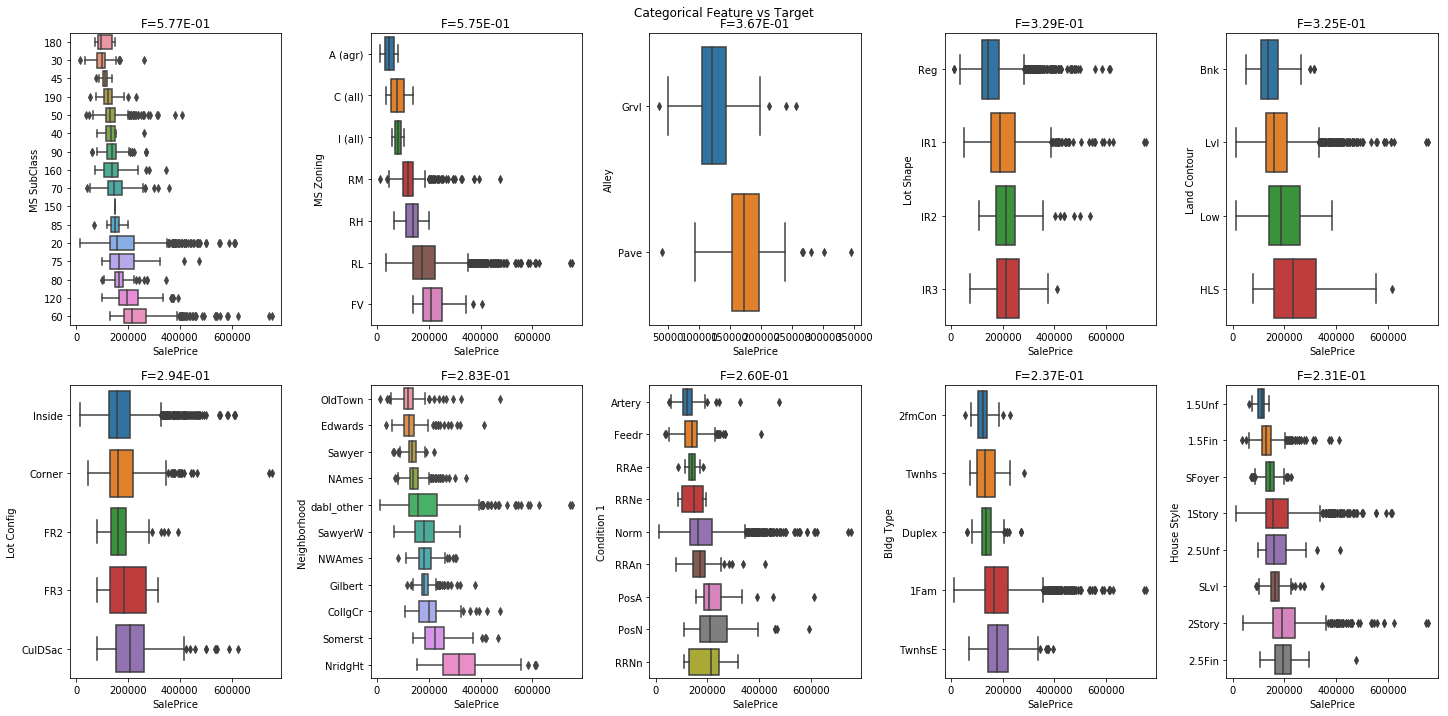

In [12]:
dabl.plot_supervised(ames_df, 'SalePrice')

You can see that high-ordinality categorical variables were summarized with rare categories binned into "dabl_other".
Also, ``GarageCars`` should maybe be plotted as a categorical variable - and there's a garage that will be build in 2200. Huh.
We were pretty aggressive with dropping "near-constant" features. Maybe being less agressive might be good in some situations?

/home/andy/checkout/dabl/dabl/preprocessing.py:237: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


Target looks like regression
Showing only top 10 of 21 continuous features
Showing only top 10 of 47 categorical features


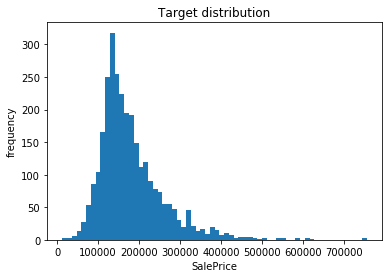

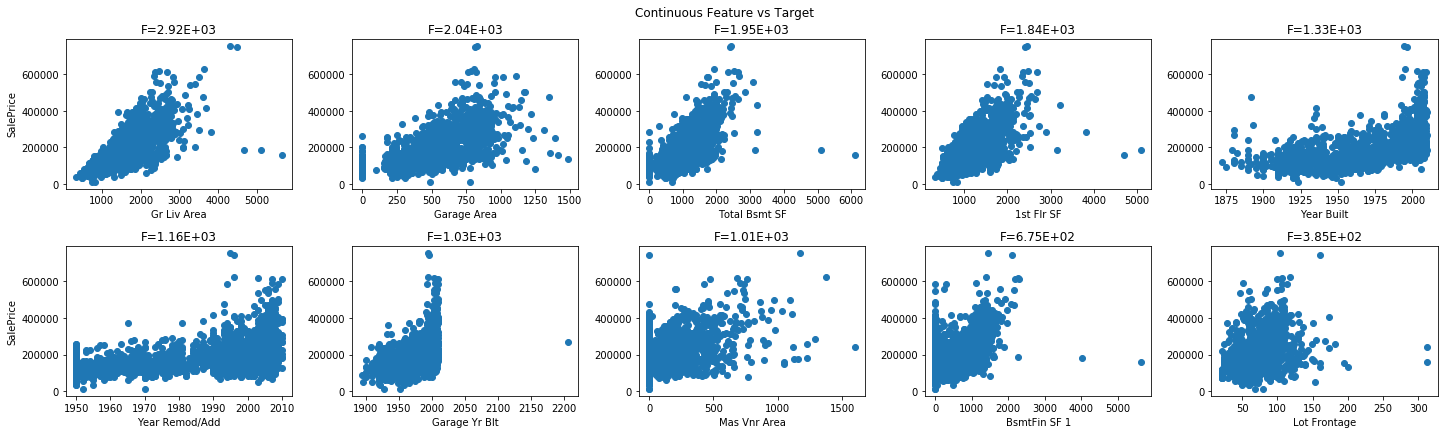

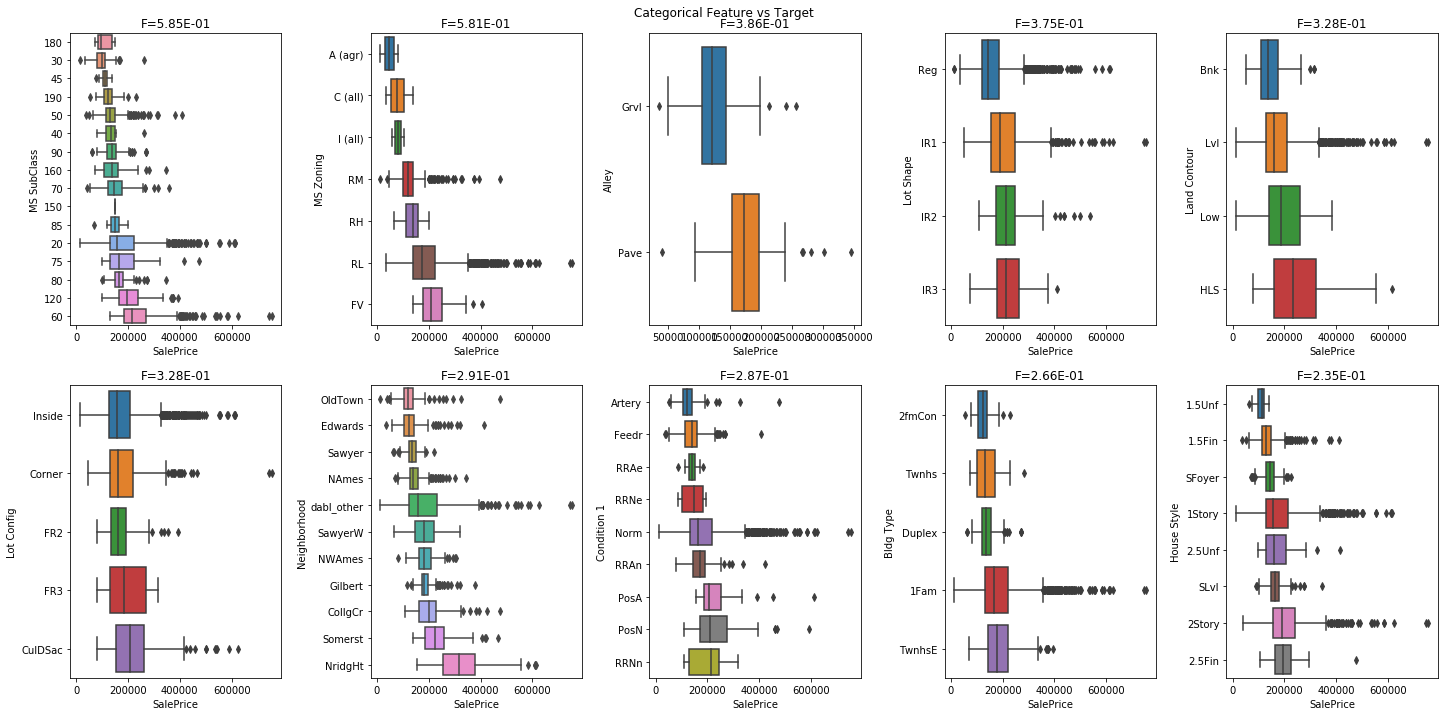

In [13]:
dabl.plot_supervised(ames_df, 'SalePrice', type_hints={'Garage Cars': 'categorical'})

In [14]:
# FIXME did garage cars vanish because it's unimportant or because we messed up the type hints? Probably the latter...

In [15]:
sr = dabl.SimpleRegressor()
sr.fit(ames_df, target_col='SalePrice')

/home/andy/checkout/dabl/dabl/preprocessing.py:237: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


DummyRegressor()
neg_mean_squared_error: -6406895302.7781    r2: -0.0108    
new best (using r2):
neg_mean_squared_error   -6.406895e+09
r2                       -1.079263e-02
Name: DummyRegressor(), dtype: float64
DecisionTreeRegressor(max_depth=1)
neg_mean_squared_error: -4130892978.2065    r2: 0.3496    
new best (using r2):
neg_mean_squared_error   -4.130893e+09
r2                        3.495590e-01
Name: DecisionTreeRegressor(max_depth=1), dtype: float64
DecisionTreeRegressor(max_depth=5)
neg_mean_squared_error: -1650859799.4677    r2: 0.7383    
new best (using r2):
neg_mean_squared_error   -1.650860e+09
r2                        7.382645e-01
Name: DecisionTreeRegressor(max_depth=5), dtype: float64
Ridge(alpha=10)
neg_mean_squared_error: -856707497.1751    r2: 0.8651    
new best (using r2):
neg_mean_squared_error   -8.567075e+08
r2                        8.651228e-01
Name: Ridge(alpha=10), dtype: float64
Lasso(alpha=10)
neg_mean_squared_error: -898730917.2767    r2: 0.8572    


SimpleRegressor(random_state=None, refit=True, verbose=1)

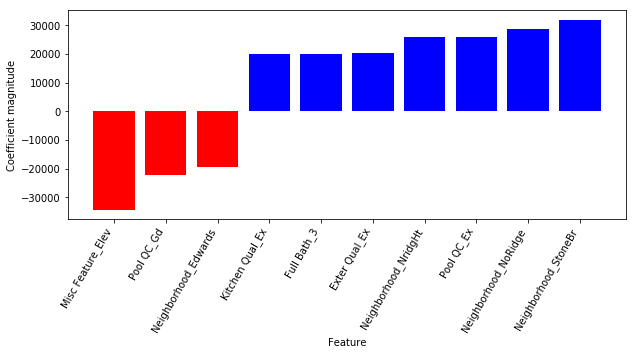

In [16]:
dabl.explain(sr)

In [ ]:
# The neighborhood seems to dominate, no continuous variable is in the top 10 highest coefficients.